In [1]:
import nltk
%matplotlib inline
nltk.download("punkt")
nltk.download("cmudict")

import sys
import streamlit as st
import os
import pandas as pd
import pickle
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import copy
import streamlit as st
import math
import scipy
import plotly.graph_objects as go
import shelve
import plotly.express as px
import pandas as pd
from random import sample
#import click
from scipy.stats import pearsonr
from science_access.t_analysis import not_want_list
import seaborn as sns

#not_want_list.extend(
#    ["link", "librarian", "issue", "abstract", "science", "cookie", "publication"]
#)

from science_access.online_app_backend import call_from_front_end
from science_access.online_app_backend import ar_manipulation
from science_access.t_analysis import text_proc
from science_access.online_app_backend import semantic_scholar_alias



from science_access.enter_author_name import (
    art_cloud,
    create_giant_strings,
    art_cloud_wl,
    zipf_plot,
)
from science_access.enter_author_name import (
    distribution_plot_from_scrape,
    grand_distribution_plot,
    data_frames_from_scrape,
)
from science_access.enter_author_name import (
    push_frame_to_screen,
    fast_art_cloud,
    grab_data_for_splash,
)
from science_access.enter_author_name import (
    frame_to_lists,
    try_and_update_cache,
    extra_options,
)
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /home/user/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/home/user/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
author_name="Brian H Smith"
def do_science(author_name):
    ar = call_from_front_end(author_name, tns=10, fast=True)
    author = pd.DataFrame(ar)
    #fig = plt.figure()
    #plt.scatter(list(range(0,len(author["numCitedBy"]))),author["numCitedBy"],label="citedby")
    #plt.scatter(list(range(0,len(author["numCitedBy"]))),author["standard"],label="readability")
    #plt.legend()
    #plt.show()
    corr, _ = pearsonr(author["numCitedBy"], author["standard"])
    #print('Pearsons correlation: %.3f' % corr)
    #fig = plt.figure()    
    #plt.scatter(author["standard"],author["numCitedBy"])
    #plt.ylabel("numCitedBy")
    #plt.xlabel("readability")
    #plt.show()

    return (author["numCitedBy"],author["standard"],author)


In [3]:
listed=[]
multi_author_frame = pd.DataFrame()

In [4]:
author_name="Patrick McGurrin"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])
listed.append((author_numCitedBy,author_standard))

2021-06-11 11:33:02.003 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [5]:
author_name="Brian H Smith"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Brian Usher"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Bradley Lusk"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

In [6]:
author_name="Thomas Close"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

In [7]:
author_name="Rebecca Featherston"
(author_numCitedBy,author_standard,df) = do_science(author_name)
listed.append((author_numCitedBy,author_standard))
multi_author_frame = pd.concat([multi_author_frame,df])


In [11]:
author_name="Paul Nicholas"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

In [9]:
author_name="David Grayden"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))


ValueError: too many values to unpack (expected 2)

In [10]:
author_name="Sayali Phatak"

(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])


In [12]:
multi_author_frame

,citationVelocity,fieldsOfStudy,numCitedBy,semantic,link,science,big_words,standard,fre_unbiased,standard_unbiased,hard_snippet,wcount,tokens,uniqueness,unique_words,sp,ss,sp_norm,ss_norm,gf
0,0,[Medicine],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.000000,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
1,0,[Medicine],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.000000,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
2,0,[Medicine],0,True,Thalamic Tremor Following Focused Ultrasound T...,True,[],80.535417,80.535417,15.0,,479,"[magnetic, resonance, guided, focused, ultraso...",0.463466,222,0.053717,0.317509,0.053717,0.317509,199.14
3,0,[Medicine],1,True,Electrophysiological Evidence for Functional (...,True,[],36.636667,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
4,0,[Medicine],1,True,Electrophysiological Evidence for Functional (...,True,[],36.636667,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0,[Chemistry],2,True,Compound Identification and In Vitro Cytotoxic...,True,[],63.590556,63.590556,57.0,,208,"[carica, papaya, leaves, are, used, as, a, rem...",0.629808,131,0.055833,0.451111,0.055833,0.451111,92.71
11,0,[Biology],4,True,Assessing potential for integrating sea grape ...,True,[],79.051364,79.051364,13.0,,199,"[this, study, assessed, integration, of, sea, ...",0.582915,116,0.041947,0.569911,0.041947,0.569911,87.29
12,0,"[Business, Medicine]",3,True,Supporting Women’s Participation in Developing...,True,[],68.135500,68.135500,46.0,,230,"[seaweeds, are, a, source, of, food, throughou...",0.552174,127,0.097775,0.462671,0.097775,0.462671,98.78
13,0,"[Business, Medicine]",3,True,Supporting Women’s Participation in Developing...,True,[],68.135500,68.135500,46.0,,230,"[seaweeds, are, a, source, of, food, throughou...",0.552174,127,0.097775,0.462671,0.097775,0.462671,98.78


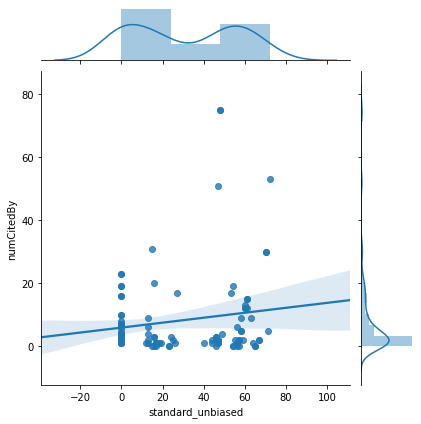

In [13]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard_unbiased",kind="reg")

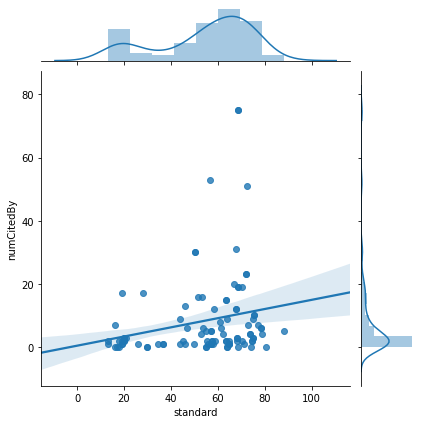

In [14]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard",kind="reg")

Harder to read manuscripts where cited more often

2021-06-11 11:39:45.344 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


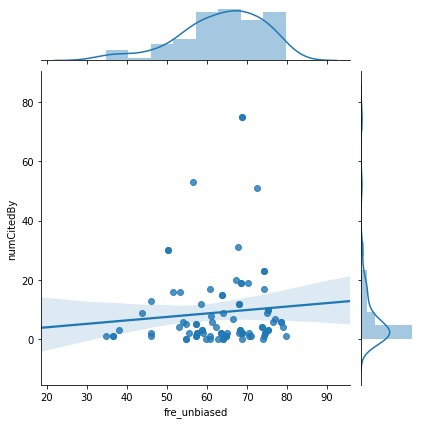

In [15]:
subset = multi_author_frame[multi_author_frame["fre_unbiased"]<=80]

sns.jointplot(data = subset,y="numCitedBy",x="fre_unbiased",kind="reg")

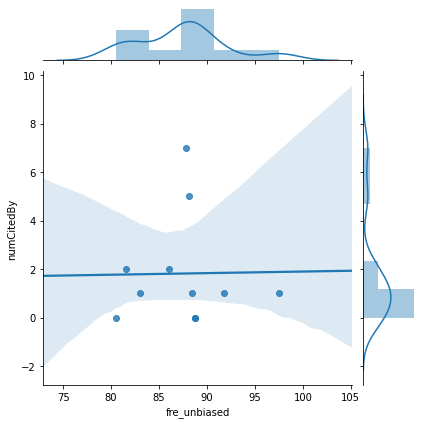

In [16]:
hard = multi_author_frame[multi_author_frame["fre_unbiased"]>=80]
sns.jointplot(data = hard,y="numCitedBy",x="fre_unbiased",kind="reg")

([('in', 1.0),
  ('heat', 0.9375),
  ('hsps', 0.875),
  ('stresses', 0.8125),
  ('environment', 0.8125),
  ('and', 0.8125),
  ('and', 0.8125),
  ('.', 0.8125),
  ('proteins', 0.75),
  ('and', 0.75),
  ('was', 0.75),
  ('.', 0.75),
  ('heat', 0.75),
  ('bee', 0.75),
  ('elicits', 0.6875),
  ('heat', 0.6875),
  ('heat', 0.6875),
  ('in', 0.6875),
  ('hsps', 0.6875),
  ('jemenitica', 0.6875),
  (')', 0.6875),
  ('mellifera', 0.6875),
  ('tested', 0.6875),
  ('to', 0.6875),
  ('the', 0.6875),
  ('in', 0.6875),
  ('(', 0.625),
  ('in', 0.625),
  ('protecting', 0.625),
  ('honey', 0.625),
  ('.', 0.625),
  ('conserved', 0.625),
  ('of', 0.625),
  ('mellifera', 0.625),
  (')', 0.625),
  ('honey', 0.625),
  ('treatment', 0.625),
  ('page', 0.625),
  ('equally', 0.625),
  ('the', 0.625),
  ('after', 0.625),
  ('was', 0.625),
  ('one', 0.625),
  ('hsp', 0.625),
  ('in', 0.625),
  ('the', 0.625),
  ('exotic', 0.625),
  ('honey', 0.5625),
  ('significant', 0.5625),
  ('stress', 0.5625),
  ('elicit

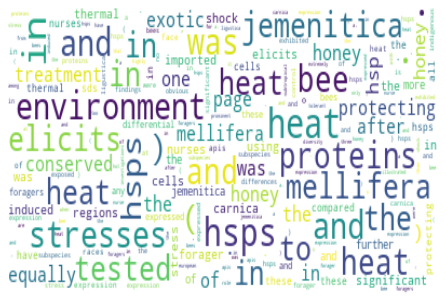

In [30]:


gs=[]
for tok in hard["hard_snippet"]:
    gs.append(tok)
gs

gs2= create_giant_strings(gs,not_want_list)
art_cloud_wl(gs2)

(<wordcloud.wordcloud.WordCloud at 0x7f3cb4acd110>,
 <Figure size 432x288 with 1 Axes>,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

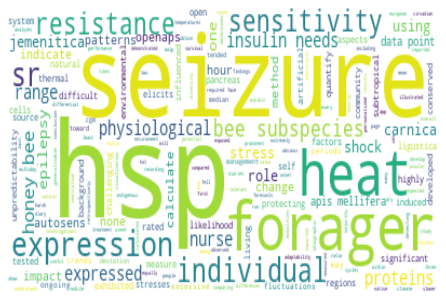

In [31]:
art_cloud(gs2)

/home/user/anaconda3/lib/python3.7/site-packages/streamlit/elements/pyplot.py:132: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "use_column_width" which is no longer supported as of 3.3 and will become an error two minor releases later



([('ventroposteriorlateral', 1.0),
  ('ventroposteriomedial', 0.9090909090909091),
  ('electrophysiological', 0.9090909090909091),
  ('photoluminescence', 0.7727272727272727),
  ('ultrasoundinduced', 0.7727272727272727),
  ('unpredictability', 0.7272727272727273),
  ('characterization', 0.7272727272727273),
  ('microstructural', 0.6818181818181818),
  ('retrospectively', 0.6818181818181818),
  ('investigations', 0.6363636363636364),
  ('accelerometers', 0.6363636363636364),
  ('contextualizes', 0.6363636363636364),
  ('visualization', 0.5909090909090909),
  ('customization', 0.5909090909090909),
  ('environmental', 0.5909090909090909),
  ('ventrolateral', 0.5909090909090909),
  ('abnormalities', 0.5909090909090909),
  ('generalizable', 0.5909090909090909),
  ('opportunities', 0.5909090909090909),
  ('rearrangement', 0.5909090909090909),
  ('physiological', 0.5909090909090909),
  ('introduction', 0.5454545454545454),
  ('tractography', 0.5454545454545454),
  ('deformations', 0.545454545

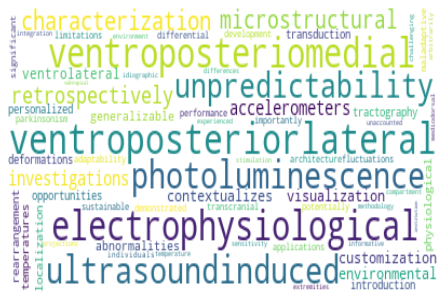

In [25]:
gs=[]
for tok in hard["tokens"]:
    gs.extend(tok)
gs

gs2= create_giant_strings(gs,not_want_list)
art_cloud_wl(gs2)
    

(<wordcloud.wordcloud.WordCloud at 0x7f3cb4225d90>,
 <Figure size 432x288 with 1 Axes>,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

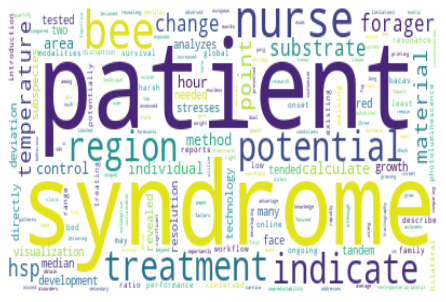

In [26]:
art_cloud(gs2)


In [18]:
subset = multi_author_frame[multi_author_frame["sp"]<=0.15]


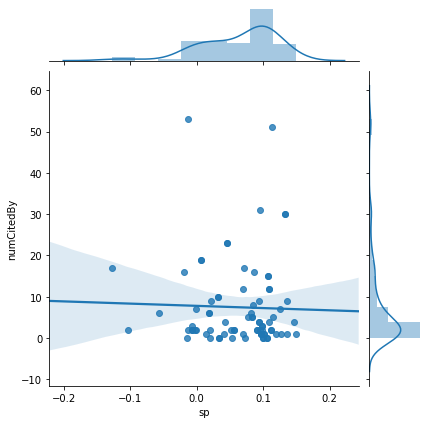

In [19]:
sns.jointplot(data = subset,y="numCitedBy",x="sp",kind="reg")

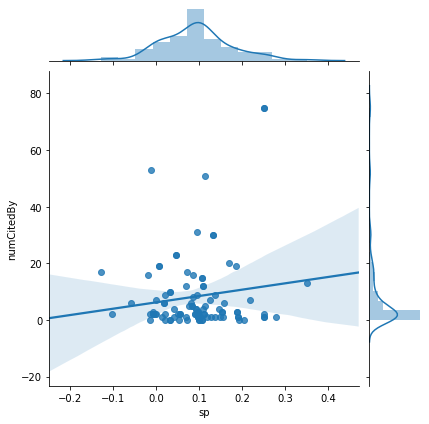

In [20]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="sp",kind="reg")

Articles with too much positive sentiment were cited less often

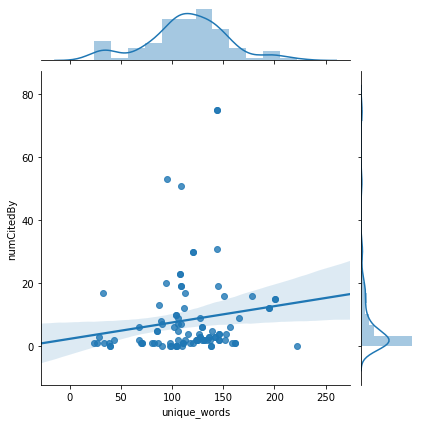

In [21]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="unique_words",kind="reg")

Articles with more unique words were cited more often

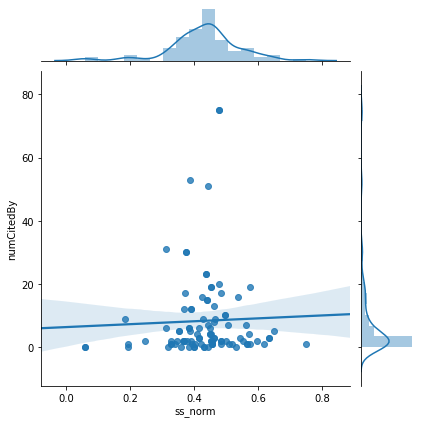

In [22]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="ss_norm",kind="reg")

Articles with more sentiment subjectivity were cited slightly more often (not statistically significant).